# Rocks Versus Mines Using Ridge Regression

In [1]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import roc_curve, auc
import pylab as plt
import seaborn as sns

sns.set()

In [2]:
x_list = []
labels = []
data_path = './data/sonar.all-data'

with open(data_path) as data:
    
    for line in data:
        # split on comma
        row = line.strip().split(',')
        
        # assign label 1.0 for 'M' and 0.0 for 'R'
        if row[-1] == 'M':
            labels.append(1.0)
        
        else:
            labels.append(0.0)
        
        # remove label from row
        row.pop()
        
        # convert row to floats
        float_row =  [float(num) for num in row]
        x_list.append(float_row)


In [3]:
# divide attribute matrix and label vector into training (2/3 of data) and test sets (1/3 of data)
indices = range(len(x_list))
x_list_test = [x_list[i] for i in indices if i % 3 == 0]
x_list_train = [x_list[i] for i in indices if i % 3 != 0]

labels_test = [labels[i] for i in indices if i % 3 == 0]
labels_train = [labels[i] for i in indices if i % 3 != 0]


In [4]:
# form list of list input into numpy arrays to match input class for sklearn linear model
x_train = np.array(x_list_train)
y_train = np.array(labels_train)

x_test = np.array(x_list_test)
y_test = np.array(labels_test)
alpha_values = [-3, -2, -1, 0, 1, 2, 3, 4, 5]

alpha_list = [0.1**i for i in alpha_values]

auc_list = []

for alph in alpha_list:
    rocks_vs_mines_ridge_model = linear_model.Ridge(alpha=alph)
    rocks_vs_mines_ridge_model.fit(x_train, y_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rocks_vs_mines_ridge_model.predict(x_test))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    auc_list.append(roc_auc)

print('AUC\t\t alpha\n')
for i in range(len(auc_list)):
    print(auc_list[i], '\t', alpha_list[i])


AUC		 alpha

0.841113841114 	 999.9999999999999
0.864045864046 	 99.99999999999999
0.907452907453 	 10.0
0.9180999181 	 1.0
0.882882882883 	 0.1
0.861588861589 	 0.010000000000000002
0.851760851761 	 0.0010000000000000002
0.850941850942 	 0.00010000000000000002
0.849303849304 	 1.0000000000000003e-05


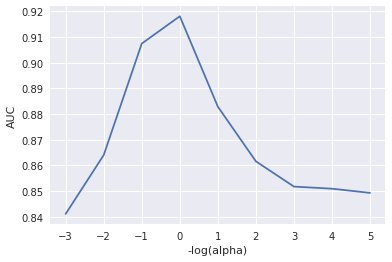

In [5]:
# plot auc values versus alpha values
plt.plot(alpha_values, auc_list)
plt.xlabel('-log(alpha)')
plt.ylabel('AUC')
plt.show()


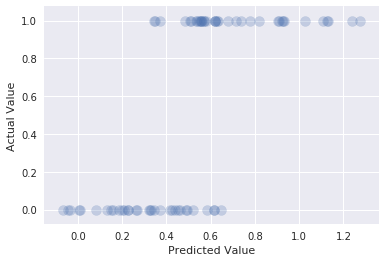

In [6]:
# visualize the performance of the best classifier
index_best = auc_list.index(max(auc_list))
alph = alpha_list[index_best]
rocks_vs_mines_ridge_model = linear_model.Ridge(alpha=alph)
rocks_vs_mines_ridge_model.fit(x_train, y_train)

# scatter plot of actual versus predicted
plt.scatter(rocks_vs_mines_ridge_model.predict(x_test), y_test, s=100, alpha=0.25)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()
